In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

https://biopython.org/wiki/Phylo
    
https://nextstrain.org/ncov/2020-04-03?l=unrooted
    
https://blog.dominodatalab.com/social-network-analysis-with-networkx/
    
http://i.stanford.edu/~julian/pdfs/nips2012.pdf
https://medium.com/katanaml/covid-19-growth-modeling-and-forecasting-with-prophet-2ff5ebd00c01
    
https://facebook.github.io/prophet/docs/non-daily_data.html#data-with-regular-gaps    

In [3]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)


In [5]:
#Quick snapshot of the Network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [7]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


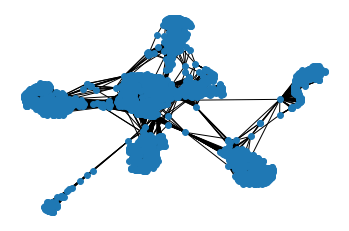

In [8]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

In [9]:
from multiprocessing import Pool
import itertools

In [10]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [11]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [12]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [13]:
bt = between_parallel(G_fb)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

AttributeError: 'dict' object has no attribute 'iteritems'

Community Detection


In [18]:
import community


In [19]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)